In [ ]:
import numpy as np # linear algebra
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
from matplotlib import style
style.use('ggplot')

In [ ]:
test=pd.read_csv("drugsComTest_raw.csv")
train=pd.read_csv("drugsComTrain_raw.csv")


In [ ]:
train.head(10)

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37
5,155963,Cialis,Benign Prostatic Hyperplasia,"""2nd day on 5mg started to work with rock hard...",2,28-Nov-15,43
6,165907,Levonorgestrel,Emergency Contraception,"""He pulled out, but he cummed a bit in me. I t...",1,7-Mar-17,5
7,102654,Aripiprazole,Bipolar Disorde,"""Abilify changed my life. There is hope. I was...",10,14-Mar-15,32
8,74811,Keppra,Epilepsy,""" I Ve had nothing but problems with the Kepp...",1,9-Aug-16,11
9,48928,Ethinyl estradiol / levonorgestrel,Birth Control,"""I had been on the pill for many years. When m...",8,8-Dec-16,1


In [ ]:
#check the shape of the given dataset
print(f'train has {train.shape[0]} number of rows and {train.shape[1]} number of columns')
print(f'train has {test.shape[0]} number of rows and {test.shape[1]} number of columns')

train has 161297 number of rows and 7 number of columns
train has 53766 number of rows and 7 number of columns


In [ ]:
train.columns

Index(['uniqueID', 'drugName', 'condition', 'review', 'rating', 'date',
       'usefulCount'],
      dtype='object')

In [ ]:
merge = [train,test]
merged_data = pd.concat(merge,ignore_index=True)

merged_data.shape   #check the shape of merged_data

(215063, 7)

In [ ]:
merged_data['uniqueID'].nunique()

215063

In [ ]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215063 entries, 0 to 215062
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   uniqueID     215063 non-null  int64 
 1   drugName     215063 non-null  object
 2   condition    213869 non-null  object
 3   review       215063 non-null  object
 4   rating       215063 non-null  int64 
 5   date         215063 non-null  object
 6   usefulCount  215063 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 11.5+ MB


In [ ]:
merged_data.describe(include='all')

,uniqueID,drugName,condition,review,rating,date,usefulCount
count,215063.000000,215063,213869,215063,215063.000000,215063,215063.000000
unique,NaN,3671,916,128478,NaN,3579,NaN
top,NaN,Levonorgestrel,Birth Control,"""Good""",NaN,1-Mar-16,NaN
freq,NaN,4930,38436,39,NaN,185,NaN
mean,116039.364814,NaN,NaN,NaN,6.990008,NaN,28.001004
std,67007.913366,NaN,NaN,NaN,3.275554,NaN,36.346069
min,0.000000,NaN,NaN,NaN,1.000000,NaN,0.000000
25%,58115.500000,NaN,NaN,NaN,5.000000,NaN,6.000000
50%,115867.000000,NaN,NaN,NaN,8.000000,NaN,16.000000
75%,173963.500000,NaN,NaN,NaN,10.000000,NaN,36.000000


In [ ]:
merged_data.isnull().sum()/merged_data.shape[0]


uniqueID       0.000000
drugName       0.000000
condition      0.005552
review         0.000000
rating         0.000000
date           0.000000
usefulCount    0.000000
dtype: float64

In [ ]:
#check number of unique values in drugName
print(merged_data['drugName'].nunique())

#check number of unique values in condition
print(merged_data['condition'].nunique())

3671
916


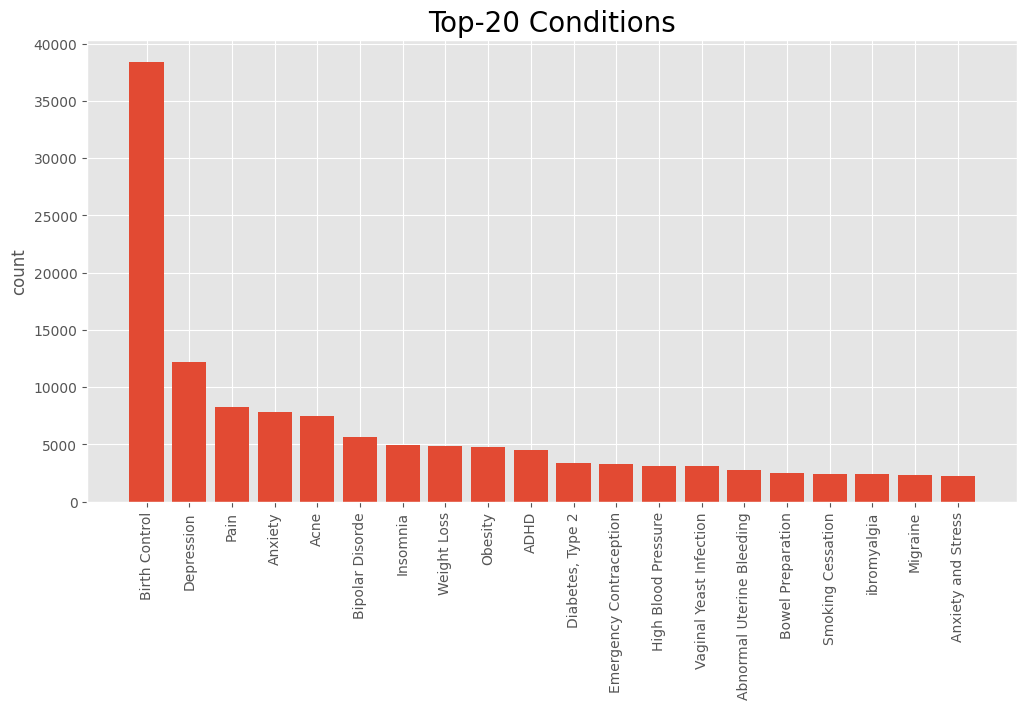

In [ ]:
#plot a bargraph to check top 20 conditions
plt.figure(figsize=(12,6))
conditions = merged_data['condition'].value_counts(ascending = False).head(20)

plt.bar(conditions.index,conditions.values)
plt.title('Top-20 Conditions',fontsize = 20)
plt.xticks(rotation=90)
plt.ylabel('count')
plt.show()

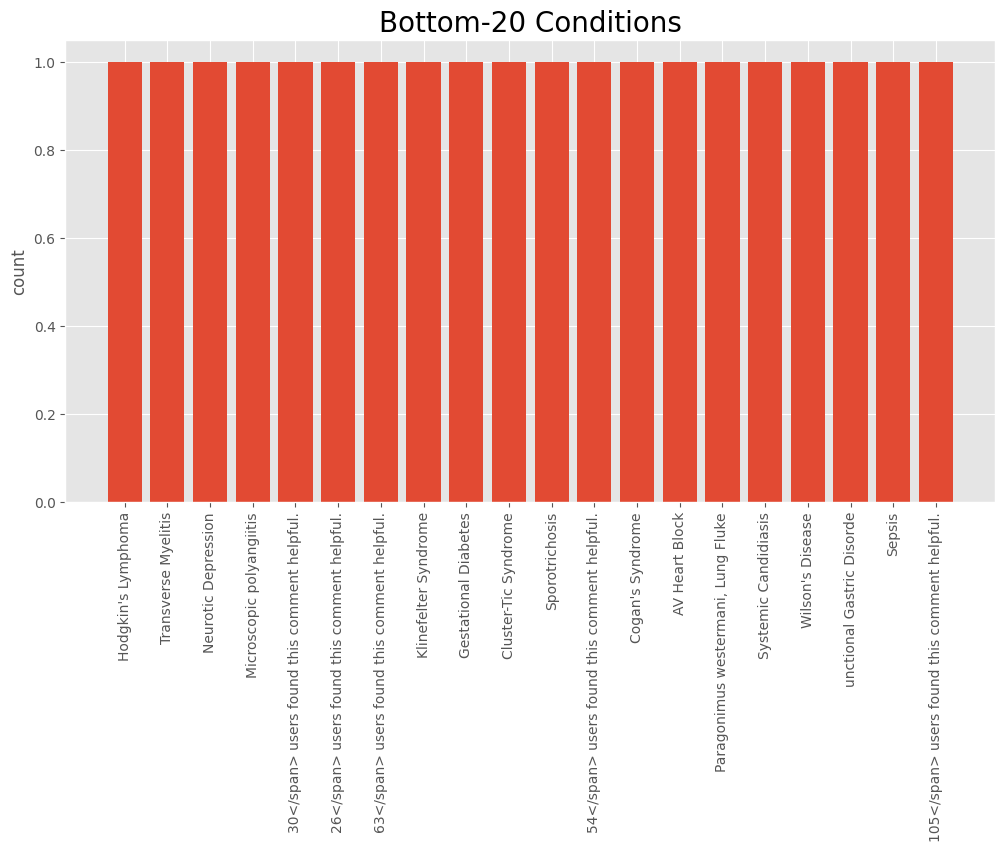

In [ ]:
plt.figure(figsize=(12,6))
conditions_bottom = merged_data['condition'].value_counts(ascending = False).tail(20)

plt.bar(conditions_bottom.index,conditions_bottom.values)
plt.title('Bottom-20 Conditions',fontsize = 20)
plt.xticks(rotation=90)
plt.ylabel('count')
plt.show()

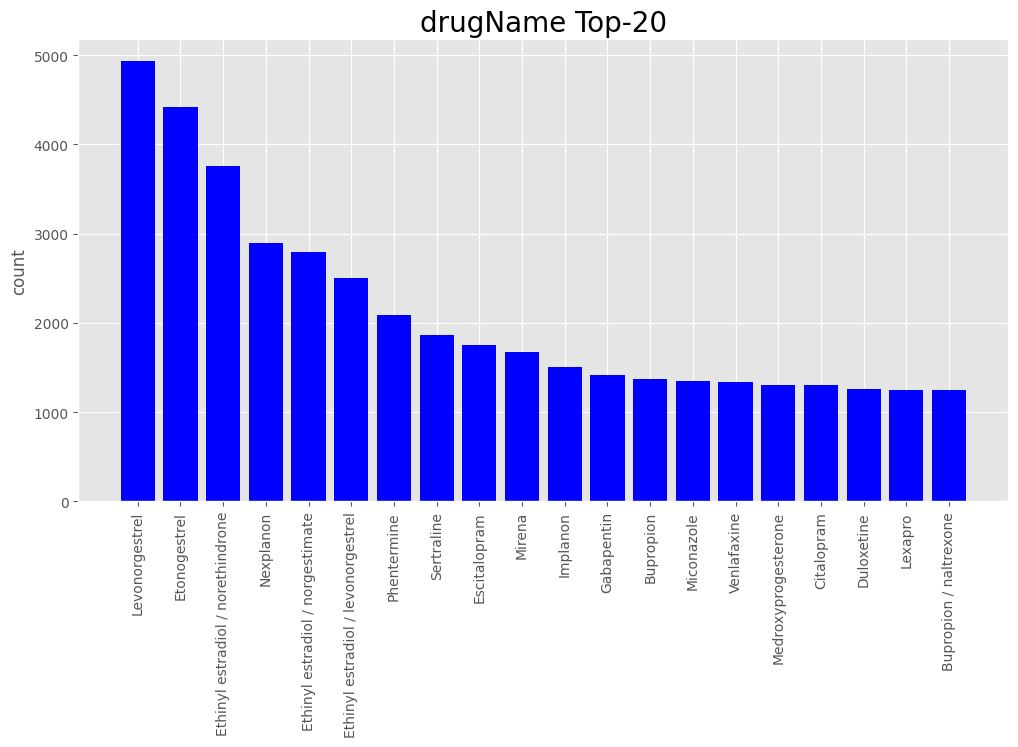

In [ ]:
#plot a bargraph to check top 20 drugName
plt.figure(figsize=(12,6))
drugName_top = merged_data['drugName'].value_counts(ascending = False).head(20)

plt.bar(drugName_top.index,drugName_top.values,color='blue')
plt.title('drugName Top-20',fontsize = 20)
plt.xticks(rotation=90)
plt.ylabel('count')
plt.show()

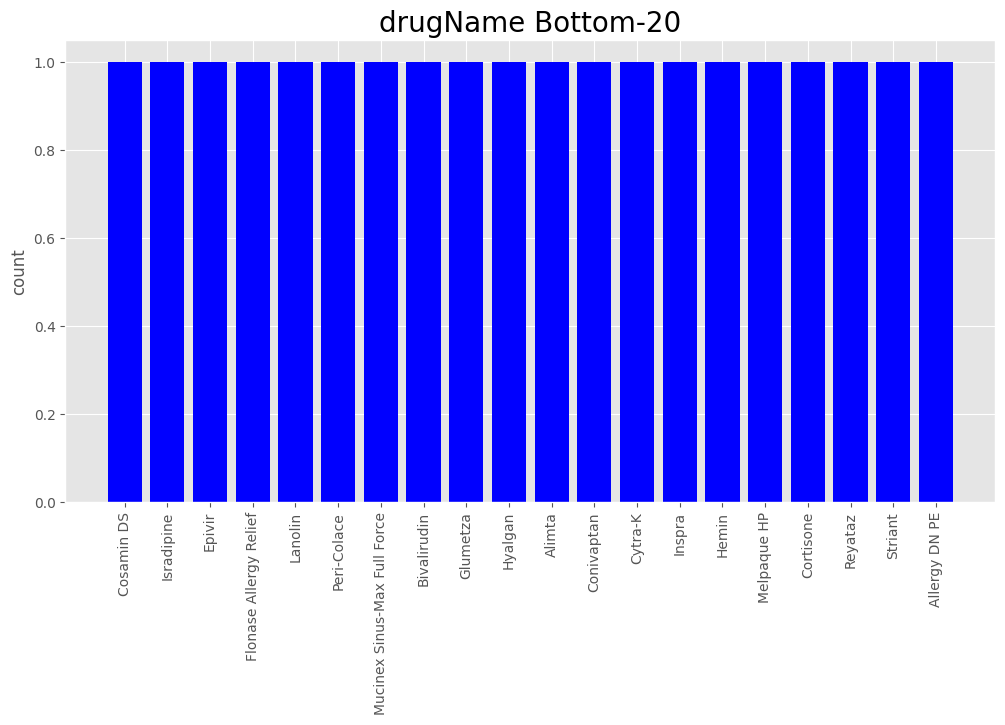

In [ ]:
plt.figure(figsize=(12,6))
drugName_bottom = merged_data['drugName'].value_counts(ascending = False).tail(20)

plt.bar(drugName_bottom.index,drugName_bottom.values,color='blue')
plt.title('drugName Bottom-20',fontsize = 20)
plt.xticks(rotation=90)
plt.ylabel('count')
plt.show()

In [ ]:
ratings_ = merged_data['rating'].value_counts().sort_values(ascending=False).reset_index().\
                    rename(columns = {'index' :'rating', 'rating' : 'counts'})
ratings_['percent'] = 100 * (ratings_['counts']/merged_data.shape[0])
print(ratings_)

   rating  counts    percent
0      10   68005  31.620967
1       9   36708  17.068487
2       1   28918  13.446292
3       8   25046  11.645890
4       7   12547   5.834104
5       5   10723   4.985981
6       2    9265   4.308040
7       3    8718   4.053696
8       6    8462   3.934661
9       4    6671   3.101882


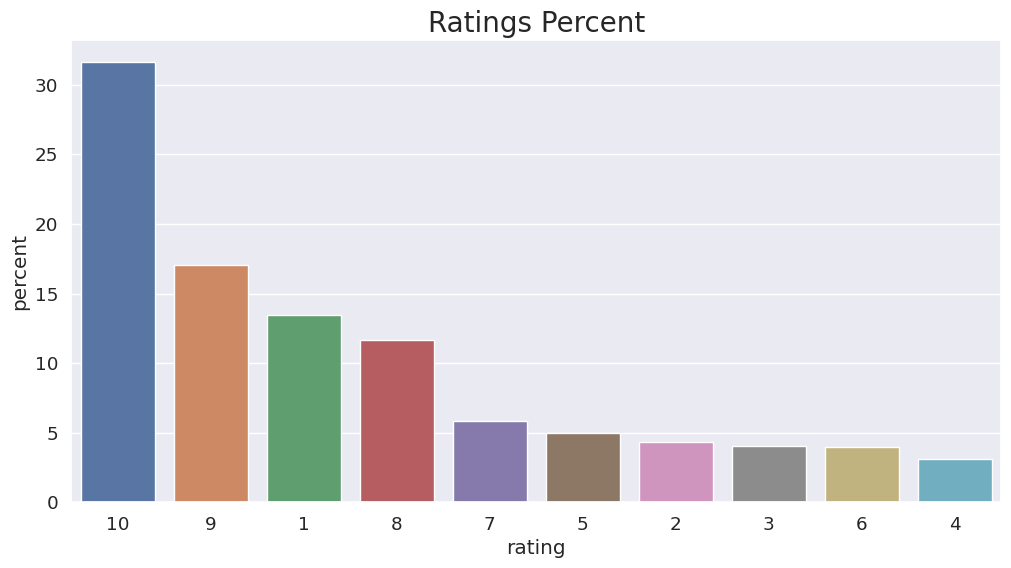

In [ ]:
# Setting the Parameter
sns.set(font_scale = 1.2, style = 'darkgrid')
plt.rcParams['figure.figsize'] = [12, 6]

#let's plot and check
sns.barplot(x = ratings_['rating'], y = ratings_['percent'],order = ratings_['rating'])
plt.title('Ratings Percent',fontsize=20)
plt.show()

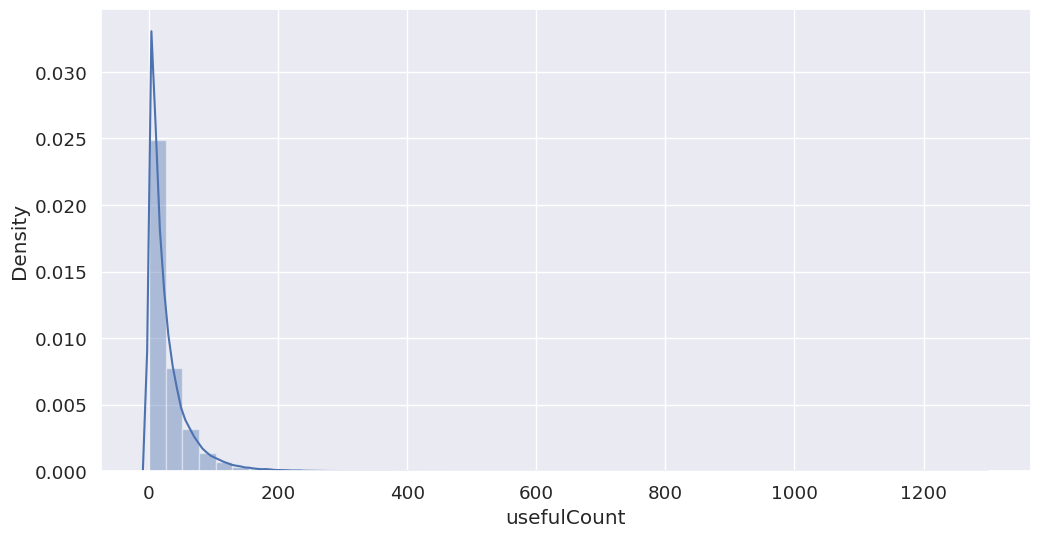

In [ ]:
sns.distplot(merged_data['usefulCount'])
plt.show()


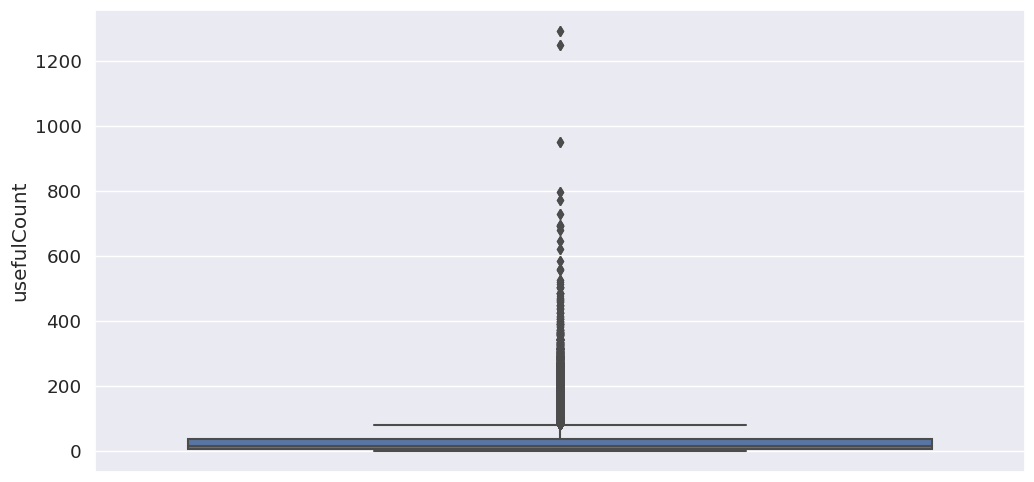

In [ ]:
#check the descriptive summary
sns.boxplot(y = merged_data['usefulCount'])
plt.show()

In [ ]:
#lets check the number of drugs/condition
merged_data.groupby('condition')['drugName'].nunique().sort_values(ascending=False).head(20)

condition
Not Listed / Othe                             253
Pain                                          219
Birth Control                                 181
High Blood Pressure                           146
Acne                                          127
Depression                                    115
Rheumatoid Arthritis                          107
Diabetes, Type 2                               97
Allergic Rhinitis                              95
Insomnia                                       85
Osteoarthritis                                 84
Bipolar Disorde                                82
Anxiety                                        81
Abnormal Uterine Bleeding                      77
Endometriosis                                  64
3</span> users found this comment helpful.     62
Psoriasis                                      61
Migraine                                       60
ADHD                                           58
4</span> users found this comment helpfu

In [ ]:
span_data = merged_data[merged_data['condition'].str.contains('</span>',case=False,regex=True) == True]
print('Number of rows with </span> values : ', len(span_data))
noisy_data_ = 100 * (len(span_data)/merged_data.shape[0])
print('Total percent of noisy data {} %  '.format(noisy_data_))

Number of rows with </span> values :  1171
Total percent of noisy data 0.5444916140851751 %  


In [ ]:
#drop the nosie
merged_data.drop(span_data.index, axis = 0, inplace=True)

In [ ]:
#check the percentage of 'not listed / othe' conditions
not_listed = merged_data[merged_data['condition'] == 'not listed / othe']
print('Number of not_listed values : ', len(not_listed))
percent_not_listed = 100 * len(not_listed)/merged_data.shape[0]
print('Total percent of noisy data {} %  '.format(percent_not_listed))

Number of not_listed values :  0
Total percent of noisy data 0.0 %  


In [ ]:
# drop noisy data
merged_data.drop(not_listed.index, axis = 0, inplace=True)

In [ ]:
# after removing the noise, let's check the shape
merged_data.shape[0]

213892

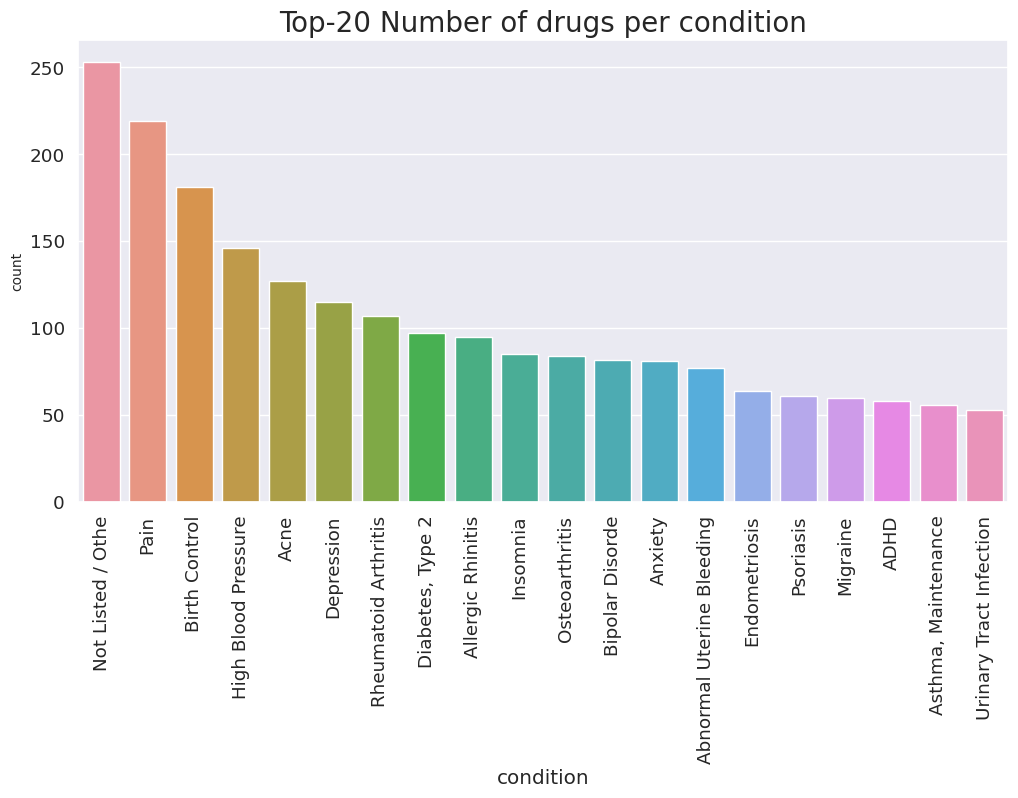

In [ ]:
#lets check the number of drugs present in our dataset condition wise
conditions_gp = merged_data.groupby('condition')['drugName'].nunique().sort_values(ascending=False)

#plot the top 20
# Setting the Parameter
condition_gp_top_20 = conditions_gp.head(20)
sns.set(font_scale = 1.2, style = 'darkgrid')
plt.rcParams['figure.figsize'] = [12, 6]
sns.barplot(x = condition_gp_top_20.index, y = condition_gp_top_20.values)
plt.title('Top-20 Number of drugs per condition',fontsize=20)
plt.xticks(rotation=90)
plt.ylabel('count',fontsize=10)
plt.show()

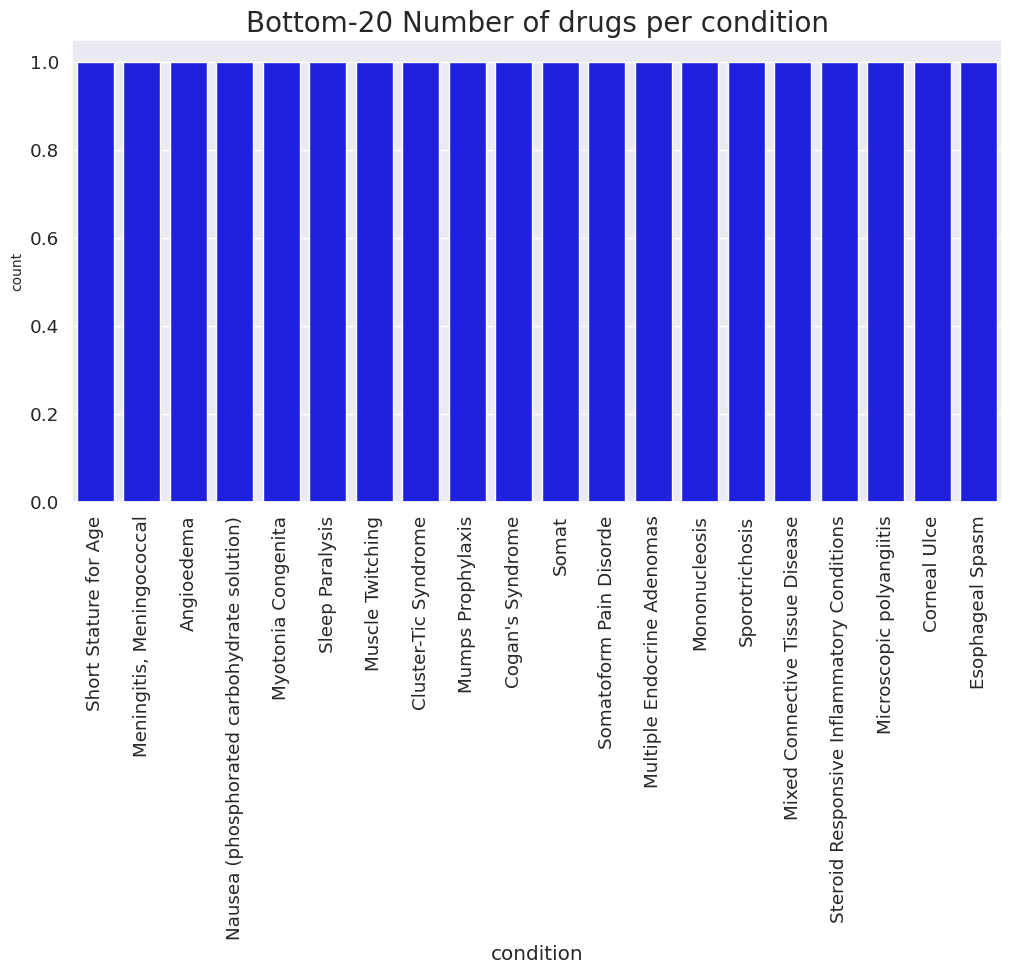

In [ ]:
condition_gp_bottom_20 = conditions_gp.tail(20)
#plot the top 20

sns.barplot(x = condition_gp_bottom_20.index, y = condition_gp_bottom_20.values,color='blue')
plt.title('Bottom-20 Number of drugs per condition',fontsize=20)
plt.xticks(rotation=90)
plt.ylabel('count',fontsize=10)
plt.show()

In [ ]:
drug_multiple_cond = merged_data.groupby('drugName')['condition'].nunique().sort_values(ascending=False)
print(drug_multiple_cond.head(10))

drugName
Prednisone       39
Gabapentin       31
Doxycycline      25
Ciprofloxacin    25
Amitriptyline    24
Venlafaxine      23
Metronidazole    23
Dexamethasone    22
Azithromycin     20
Triamcinolone    20
Name: condition, dtype: int64


In [ ]:
#Let's check the Number of drugs with rating 10.
merged_data[merged_data['rating'] == 10]['drugName'].nunique()

2914

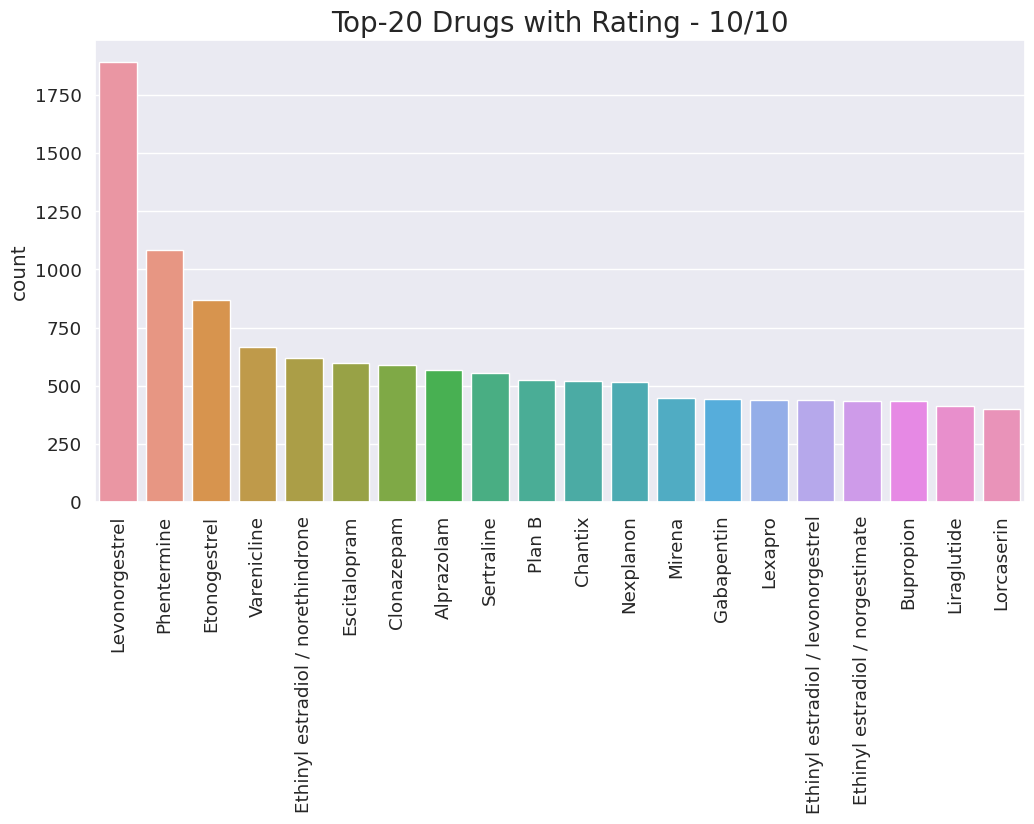

In [ ]:
#Check top 20 drugs with rating=10/10
top_20_ratings = merged_data[merged_data['rating'] == 10]['drugName'].value_counts().head(20)
sns.barplot(x = top_20_ratings.index, y = top_20_ratings.values )
plt.xticks(rotation=90)
plt.title('Top-20 Drugs with Rating - 10/10', fontsize=20)
plt.ylabel('count')
plt.show()

In [ ]:
merged_data[merged_data['drugName'] == 'Levonorgestrel']['condition'].unique()

array(['Emergency Contraception', 'Birth Control',
       'Abnormal Uterine Bleeding', nan, 'Not Listed / Othe'],
      dtype=object)

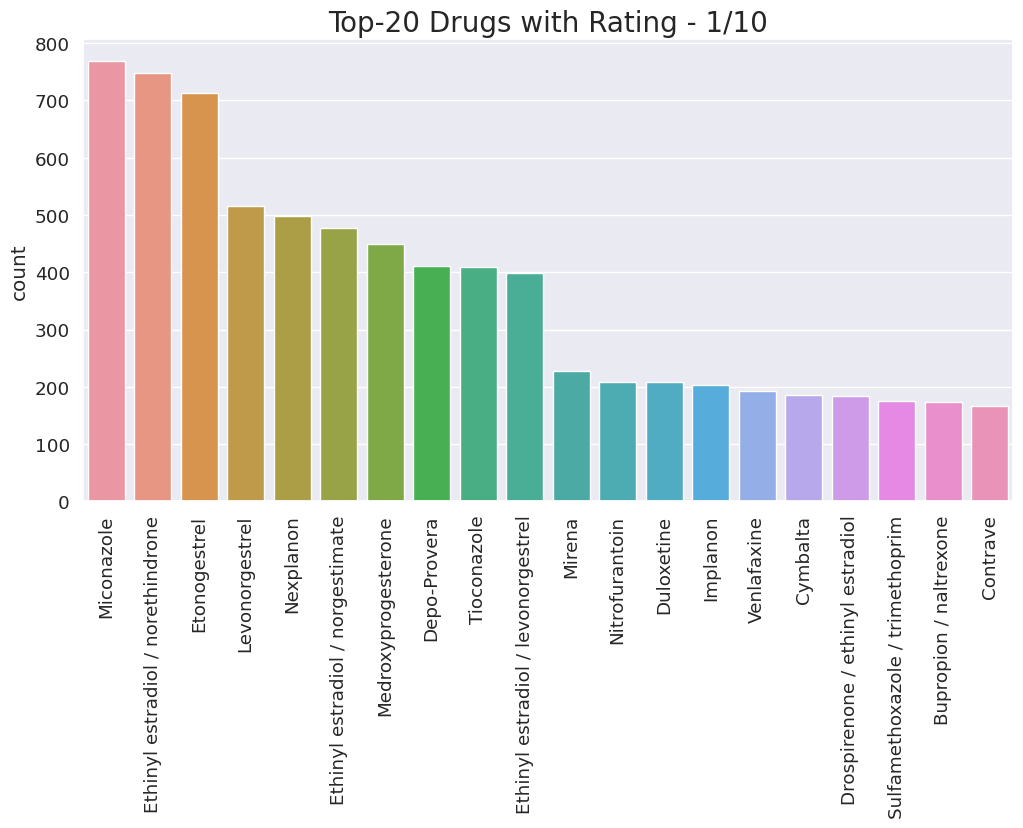

In [ ]:
top_20_ratings_1 = merged_data[merged_data['rating'] == 1]['drugName'].value_counts().head(20)
sns.barplot(x = top_20_ratings_1.index, y = top_20_ratings_1.values )
plt.xticks(rotation=90)
plt.title('Top-20 Drugs with Rating - 1/10', fontsize=20)
plt.ylabel('count')
plt.show()

In [ ]:
# convert date to datetime and create year andd month features

merged_data['date'] = pd.to_datetime(merged_data['date'])
merged_data['year'] = merged_data['date'].dt.year  #create year
merged_data['month'] = merged_data['date'].dt.month #create month

In [ ]:
merged_data.isnull().sum()

uniqueID          0
drugName          0
condition      1194
review            0
rating            0
date              0
usefulCount       0
year              0
month             0
dtype: int64

In [ ]:
merged_data.dropna(inplace=True, axis=0)

In [ ]:
for i in merged_data['review'][0:3]:
    print(i,'\n')

"It has no side effect, I take it in combination of Bystolic 5 Mg and Fish Oil" 

"My son is halfway through his fourth week of Intuniv. We became concerned when he began this last week, when he started taking the highest dose he will be on. For two days, he could hardly get out of bed, was very cranky, and slept for nearly 8 hours on a drive home from school vacation (very unusual for him.) I called his doctor on Monday morning and she said to stick it out a few days. See how he did at school, and with getting up in the morning. The last two days have been problem free. He is MUCH more agreeable than ever. He is less emotional (a good thing), less cranky. He is remembering all the things he should. Overall his behavior is better. 
We have tried many different medications and so far this is the most effective." 

"I used to take another oral contraceptive, which had 21 pill cycle, and was very happy- very light periods, max 5 days, no other side effects. But it contained hormone gestod

In [ ]:
from bs4 import BeautifulSoup
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer

nltk.download('stopwords')  # You need to download stopwords if you haven't already

stops = set(stopwords.words('english'))  # 'english' should be in lowercase

stemmer = SnowballStemmer('english')  # 'english' should be in lowercase

def review_to_words(raw_review):
    # 1. Delete HTML
    review_text = BeautifulSoup(raw_review, 'html.parser').get_text()
    # 2. Make a space
    letters_only = re.sub('[^a-zA-Z]', ' ', review_text)
    # 3. Lowercase letters
    words = letters_only.lower().split()
    # 5. Stopwords
    meaningful_words = [w for w in words if not w in stops]
    # 6. Stemming
    stemming_words = [stemmer.stem(w) for w in meaningful_words]
    # 7. Space join words
    return ' '.join(stemming_words)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
merged_data['review'] = merged_data['review'].apply(review_to_words)

In [ ]:
merged_data['sentiment'] = merged_data["rating"].apply(lambda x: 1 if x > 5 else 0)

In [ ]:
from sklearn.model_selection import train_test_split #import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer #import TfidfVectorizer
from sklearn.metrics import confusion_matrix #import confusion_matrix
from sklearn.naive_bayes import MultinomialNB #import MultinomialNB
from sklearn.ensemble import RandomForestClassifier

In [ ]:
vectorizer = TfidfVectorizer()
reviews_corpus = vectorizer.fit_transform(merged_data.review)
reviews_corpus.shape

(212698, 34709)

In [ ]:
sentiment = merged_data['sentiment']
sentiment.shape

(212698,)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(reviews_corpus,sentiment,test_size=0.33,random_state=42)
print('Train data shape ',X_train.shape,Y_train.shape)
print('Test data shape ',X_test.shape,Y_test.shape)

Train data shape  (142507, 34709) (142507,)
Test data shape  (70191, 34709) (70191,)


In [ ]:
clf = MultinomialNB().fit(X_train, Y_train) #fit the training data

pred = clf.predict(X_test) #predict the sentiment for test data

print("Accuracy: %s" % str(clf.score(X_test, Y_test))) #check accuracy
print("Confusion Matrix")
print(confusion_matrix(pred, Y_test))

Accuracy: 0.7589719479705376
Confusion Matrix
[[ 4506   646]
 [16272 48767]]


In [ ]:
clf = RandomForestClassifier().fit(X_train, Y_train)

pred = clf.predict(X_test)

print("Accuracy: %s" % str(clf.score(X_test, Y_test)))
print("Confusion Matrix")
print(confusion_matrix(pred, Y_test))

Accuracy: 0.8961405308372868
Confusion Matrix
[[14002   514]
 [ 6776 48899]]
